# Scrapping Reddit Data and using ChatGPT to write engaging post titles

Web scrapping data can be used with extraction techniques to analyze the impact of specific words and emojis in online communities. This project focuses on Subreddits, which are forums dedicated to specific topics, and looks at how certain keywords and symbols influence the engagement and popularity of posts within these communities. This research provides valuable insights into the role of language and symbols in shaping online conversations and can have important implications for understanding the dynamics of digital communication. In this particular example we scrap data from the subreddit ``r/datascience``. 

Necessary libraries

In [1]:
# installs the Python Reddit API Wrapper (praw) library, which allows for easy access to the Reddit API.
!pip install praw

# imports the praw library.
import praw

# imports the pandas library, which is used for data manipulation and analysis.
import pandas as pd

# imports the re (regular expressions) library, which is used for pattern matching in strings.
import re

# imports the matplotlib library, which is used for data visualization.
import matplotlib.pyplot as plt

## 1. Reddit scrapping bot

The bot can be programmed to scrape specific subreddits, posts, comments, or other data, and can be configured to run at regular intervals to collect up-to-date information. The collected data can then be processed and analyzed to uncover trends, insights, and other information about Reddit and its users. With its ability to automate the data collection process, a Reddit scraping bot can save time and resources compared to manual data gathering methods. In order for this to work you will need to use your own ``cliend_id`` and secret key ``client_secret``.

In [2]:
reddit = praw.Reddit(client_id='***************', client_secret='****************', user_agent='WebScrapping')


Version 7.6.0 of praw is outdated. Version 7.6.1 was released Friday November 11, 2022.


Alternative command to extract top posts

In [3]:
# top_posts = reddit.subreddit('datascience').top(limit=600)
# top_posts

## 2. Storing the collected data into a .csv file locally

In [4]:
posts = []
name='datascience'
ml_subreddit = reddit.subreddit(name)
for post in ml_subreddit.hot(limit=600): # top, new or hot commands
    
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

path=str(r'C:\Users\pizza\Desktop\projects\uploaded\reddit_scrapping_project\%s%s'%(name,'.csv'))

posts.to_csv(path, index = False)
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Weekly Entering & Transitioning - Thread 06 Fe...,7,10uy5z1,datascience,https://www.reddit.com/r/datascience/comments/...,123,\n\nWelcome to this week's entering & transit...,1.675660e+09
1,"Calling all NLP gurus, Meta is paying top doll...",723,10zvb04,datascience,https://i.redd.it/ywof5cgsgnha1.jpg,65,,1.676143e+09
2,Fun Post- Kind of Sampling would have been use...,7,110h9gi,datascience,https://www.reddit.com/r/datascience/comments/...,4,I recently rewatched Infinity war. As we all k...,1.676213e+09
3,What would you change about the culture in Dat...,4,110i4fw,datascience,https://www.reddit.com/r/datascience/comments/...,22,Every field has its culture. What would you ch...,1.676215e+09
4,Advice request: How to find a subject?,4,110fkep,datascience,https://www.reddit.com/r/datascience/comments/...,1,"Hello, I came here because this has been buggi...",1.676208e+09
...,...,...,...,...,...,...,...,...
595,DS career doubt,5,10nfzg4,datascience,https://www.reddit.com/r/datascience/comments/...,16,"Hey I'm a business consultant, and by the end ...",1.674915e+09
596,Creating Real-World AI Models by Newbies With ...,0,10nqco3,datascience,https://xrl1.sh/posts/coordinates-model-with-C...,0,,1.674942e+09
597,Implementing GPTZero from scratch,6,10ndm39,datascience,https://www.reddit.com/r/datascience/comments/...,0,We've gone through the original implementation...,1.674908e+09
598,Does this field attract arrogant people?,232,10mmwnd,datascience,https://www.reddit.com/r/datascience/comments/...,123,I have just noticed that a lot of people in th...,1.674832e+09


## 3. Reading ``.csv`` files to access the data

The csv module in Python provides a reader class for reading CSV files. The csv.reader class allows us to iterate over the rows of a CSV file and access the data in a row-by-row fashion. This is useful when we have a large CSV file and don't want to load the entire file into memory at once. By using the csv.reader class, we can read the file in chunks and process the data incrementally.

In [5]:
opened_file = open("C:/Users/pizza/Desktop/projects/uploaded/reddit_scrapping_project/" + name + ".csv", encoding = "utf8")
from csv import reader
read_file = reader(opened_file)
posts_data = list(read_file)

Since our goal is to determine the impact of key words in the post engagement, our first approach is to split the `title` items into a list of of strings. Emoji impact will also be taken into account, thus the reason for using the following `.split` method from the Regex Python library.

In [6]:
title_list=[]
for row in posts_data[1:]:
    text=row[0]
    title=re.split('(\W)', text)
    title_list.append(title)

The code in the cell above gives a list of lists where each row is composed of a list of words and special characters (including spaces, commas, question marks, etc). This approach will come in useful for future analysis. 

## 4. Unique word filter

We create the function `unique_word_counter` which first initializes an empty list ``complete_list``, which will be used to store the lists of unique words. Then, the function iterates over each string in ``a_list`` using a for loop. For each ``string``, a new list ``new_list`` is created, and a counter ``n`` is initialized to ``0``.

The function then uses a while loop to iterate over each word in the current string, starting from the first word. For each word, the function checks if it is in the ``new_list``. If the word is not in new_list, it is added. If the word is already in ``new_list``, the loop continues to the next word without adding it again. We define a function to filter out repeated words in the same title. This way we create a list of words containing only unique words and characters for every title.

In [7]:
def unique_word_counter (a_list):
    complete_list=[]
    for title in a_list:
        new_list=[]
        n=0
        while n < len(title):
            word=title[n]
            if word not in new_list:
                new_list.append(word)
            elif word in new_list: 
                pass
            n=n+1
        complete_list.append(new_list)
    return complete_list

new_title_list=unique_word_counter(title_list)
print(new_title_list[:5])

[['Weekly', ' ', 'Entering', '', '&', 'Transitioning', '-', 'Thread', '06', 'Feb', ',', '2023', '13'], ['Calling', ' ', 'all', 'NLP', 'gurus', ',', '', 'Meta', 'is', 'paying', 'top', 'dollar', '😂'], ['Fun', ' ', 'Post', '-', '', 'Kind', 'of', 'Sampling', 'would', 'have', 'been', 'used', 'in', 'Infinity', 'War', '.'], ['What', ' ', 'would', 'you', 'change', 'about', 'the', 'culture', 'in', 'Datascience', '?', ''], ['Advice', ' ', 'request', ':', '', 'How', 'to', 'find', 'a', 'subject', '?']]


### 4.1 Parallel iteration through 2 lists

Parallel iteration allows us to go over two lists simultaneously, where each iteration of the loop accesses the corresponding elements of both lists. This can be achieved using the ``zip`` function, which returns an iterator of tuples, where each tuple contains the elements from each list with the same index. This allows for operations to be performed on the elements of both lists in parallel.

Iterating through ``new_title_list`` and the `posts_data` arrays in order to add to each row information regarding the post number of upvotes and the post number of comments.

In [8]:
listanueva1=[]
for f, b in list(zip(new_title_list, posts_data[1:])):
    listanueva1.append(f + [b[1], b[5]])
print(listanueva1[:5])

[['Weekly', ' ', 'Entering', '', '&', 'Transitioning', '-', 'Thread', '06', 'Feb', ',', '2023', '13', '7', '123'], ['Calling', ' ', 'all', 'NLP', 'gurus', ',', '', 'Meta', 'is', 'paying', 'top', 'dollar', '😂', '723', '65'], ['Fun', ' ', 'Post', '-', '', 'Kind', 'of', 'Sampling', 'would', 'have', 'been', 'used', 'in', 'Infinity', 'War', '.', '7', '4'], ['What', ' ', 'would', 'you', 'change', 'about', 'the', 'culture', 'in', 'Datascience', '?', '', '4', '22'], ['Advice', ' ', 'request', ':', '', 'How', 'to', 'find', 'a', 'subject', '?', '4', '1']]


As we can see the structure for our list of lists is comprised of different rows, each containing the information of:
- List of the different words from each title
- Upvotes count
- Number of comments

### 4.2 Cleaning irrelevant characters and lower casing all words

Note that I intentionally maintained the punctuation characters of `,` and `.` in order to determine in future versions if long or complex syntax titles get more upvotes. We will also remove all words with 2 or 1 character as to avoid prepositions and numbers.

In [9]:
# Initialize two empty lists to store the processed words
cleaned=[]
clean=[]

for title in listanueva1:

    clean = []
 
    for word in title[:-2]: 
        # Check if the word is a space, an empty string, or has less than 3 characters
        if word == " " or word == "" or len(word) < 3:
            # If so, remove the word
            title.remove(word)
        else:
            # If the word passes the above checks, convert it to lowercase
            word = word.lower()
            clean.append(word)
    cleaned.append(clean)

In [10]:
listanueva=[]
for f, b in list(zip(cleaned, listanueva1)):
    listanueva.append(f + [b[-2], b[-1]])
print(listanueva[:5])

[['weekly', 'entering', 'transitioning', 'thread', 'feb', '2023', '7', '123'], ['calling', 'all', 'nlp', 'gurus', 'meta', 'paying', 'top', 'dollar', '723', '65'], ['fun', 'post', 'kind', 'sampling', 'would', 'have', 'been', 'used', 'infinity', 'war', '7', '4'], ['what', 'would', 'you', 'change', 'about', 'the', 'culture', 'datascience', '4', '22'], ['advice', 'request', 'how', 'find', 'subject', '4', '1']]


## 5. Relevant data per unique word

We create different dictionaries to store the global amount of upvotes and comments for each word or special character. Additionally we also count the amount of times a unique word or character has been posted. Note that words appearing more than once in the same title will not be taken into account. 

### 5.1 Upvotes

We create an empty dictionary called ``upvotes_dictionary``. It then iterates over a list called ``listanueva``, and for each element in the list, it iterates over a slice of that element (excluding the last two elements) which is a list of words. For each word, we retrieve the value of the second-to-last element in the current element of ``listanueva`` which is the score, and assigns it to the variable score.

Lastly it check if the current word is already in ``upvotes_dictionary``. If it is, the code adds the score to the value associated with that word. If it is not, the code adds the word as a new key in the dictionary and assigns the score as its value.

In [11]:
upvotes_dictionary={}
for row in listanueva:
    for word in row[:-2]:
        score = int(row[-2])
    
        if word in upvotes_dictionary:
            upvotes_dictionary[word] = upvotes_dictionary[word] + score
        
        elif word not in upvotes_dictionary:
            upvotes_dictionary[word] = score

### 5.2 Comments number

Similarly to our last step, we implement the following code to create the ``comments_dictionary``. We then iterate through each row in the ``listanueva list``. For each row, we iterate through each word in the row, excluding the last two elements (the score and the number of comments). Then we retrieve the number of comments for the current word and adds it to the count in the ``comments_dictionary`` dictionary. If the word is already a ``key`` in the dictionary, the count is updated by adding the comments. If the word is not yet in the dictionary, it is added as a new ``key`` with the comments count as the value.

In [12]:
comments_dictionary={}
for row in listanueva:
    for word in row[:-2]:
        comments = int(row[-1])
    
        if word in comments_dictionary:
            comments_dictionary[word] = comments_dictionary[word] + comments
        
        elif word not in comments_dictionary:
            comments_dictionary[word] = comments

### 5.3 Unique word counter

The following dictionary stores a list of unique words along with its total count.

In [13]:
count_dictionary={}
for row in listanueva:
    for word in row[:-2]:
    
        if word in count_dictionary:
            count_dictionary[word] = count_dictionary[word] + 1
        
        elif word not in count_dictionary:
            count_dictionary[word] = 1 

### 5.4 Upvotes - Comments number ratio

The upvotes/comments ratio can be an interesting value to further look into

In [14]:
mean_dictionary = {x:float(upvotes_dictionary[x])/count_dictionary[x] for x in count_dictionary}

### 5.5 Sorting dictionaries

Below are shown the top 20 words for each dictionary

#### 5.5.1 Upvotes dictionary

In [15]:
sorted_upvotes_dictionary = dict(sorted(upvotes_dictionary.items(), key=lambda item: item[1], reverse=True))

list(sorted_upvotes_dictionary.items())[:10]

[('data', 3815),
 ('this', 3601),
 ('the', 3008),
 ('manager', 2875),
 ('hiring', 2623),
 ('what', 2488),
 ('here', 2421),
 ('right', 2394),
 ('thoughts', 1709),
 ('with', 1626)]

#### 5.5.2 Comments dictionary

In [16]:
sorted_comments_dictionary = dict(sorted(comments_dictionary.items(), key=lambda item: item[1], reverse=True))

list(sorted_comments_dictionary.items())[:10]

[('data', 2779),
 ('the', 1406),
 ('for', 1399),
 ('what', 1173),
 ('how', 1139),
 ('with', 1038),
 ('and', 1001),
 ('science', 890),
 ('you', 886),
 ('this', 863)]

#### 5.5.3 Mean dictionary

In [17]:
sorted_mean_dictionary = dict(sorted(mean_dictionary.items(), key=lambda item: item[1], reverse=True))

list(sorted_mean_dictionary.items())[:10]

[('waittt', 1568.0),
 ('speak', 1060.0),
 ('calling', 723.0),
 ('gurus', 723.0),
 ('paying', 723.0),
 ('dollar', 723.0),
 ('hiring', 655.75),
 ('right', 598.5),
 ('barely', 565.0),
 ('continue', 545.0)]

#### 5.5.4 Count dictionary

In [18]:
sorted_count_dictionary = dict(sorted(count_dictionary.items(), key=lambda item: item[1], reverse=True))

list(sorted_count_dictionary.items())[:10]

[('data', 214),
 ('for', 117),
 ('science', 93),
 ('the', 86),
 ('how', 81),
 ('and', 72),
 ('what', 62),
 ('with', 57),
 ('you', 52),
 ('job', 36)]

In [19]:
len(count_dictionary)

1567

## 6. Visualizing results

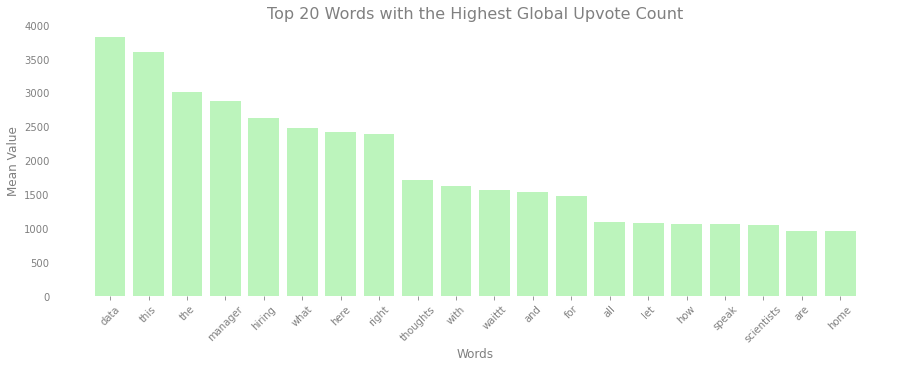

In [21]:
import matplotlib.pyplot as plt

words = list(sorted_upvotes_dictionary.keys())[:20]
values = list(sorted_upvotes_dictionary.values())[:20]

fig, ax = plt.subplots(figsize=(15, 5))
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

ax.bar(words, values, color='#90EE90', alpha = 0.6)
ax.set_xlabel('Words', fontsize=12, color = "grey")
ax.set_ylabel('Mean Value', fontsize=12, color="grey")
ax.set_title('Top 20 Words with the Highest Global Upvote Count', fontsize=16, color = "grey")
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.show()

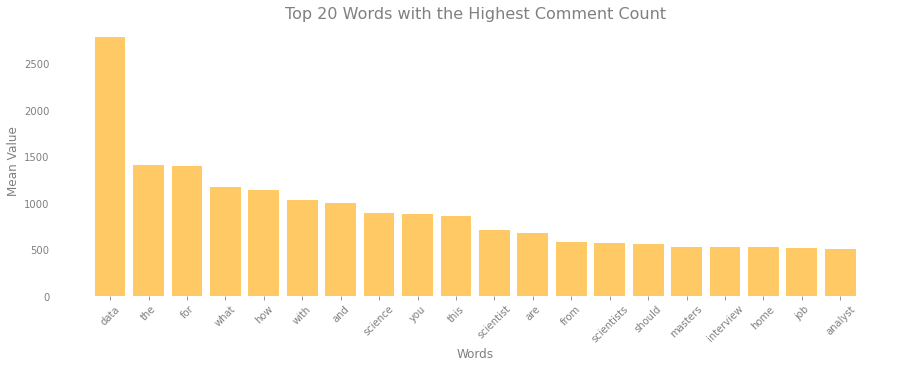

In [22]:
words = list(sorted_comments_dictionary.keys())[:20]
values = list(sorted_comments_dictionary.values())[:20]

fig, ax = plt.subplots(figsize=(15, 5))
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

ax.bar(words, values, color='#FFA500', alpha =0.6)
ax.set_xlabel('Words', fontsize=12, color = "grey")
ax.set_ylabel('Mean Value', fontsize=12, color="grey")
ax.set_title('Top 20 Words with the Highest Comment Count', fontsize=16, color = "grey")
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.show()

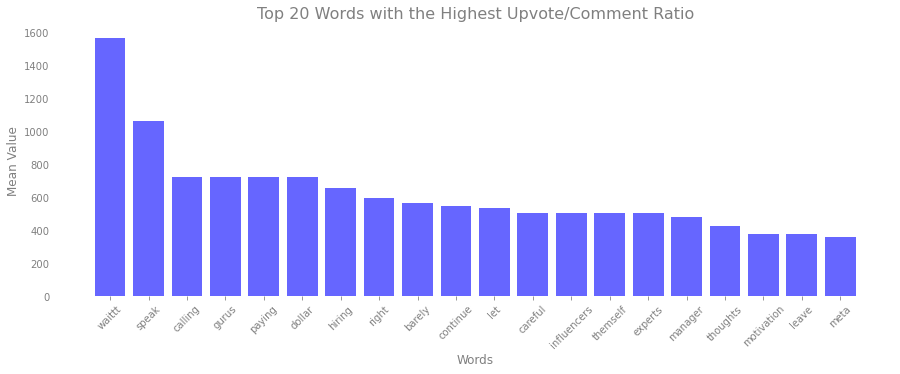

In [23]:
import matplotlib.pyplot as plt

words = list(sorted_mean_dictionary.keys())[:20]
values = list(sorted_mean_dictionary.values())[:20]

fig, ax = plt.subplots(figsize=(15, 5))
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

ax.bar(words, values, color='b', alpha =0.6)
ax.set_xlabel('Words', fontsize=12, color = "grey")
ax.set_ylabel('Mean Value', fontsize=12, color="grey")
ax.set_title('Top 20 Words with the Highest Upvote/Comment Ratio', fontsize=16, color = "grey")
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.show()

## 7. Using Chat GPT API

We install the OpenAI library and set up an API key to use with the OpenAI API. The OpenAI library provides access to state-of-the-art machine learning models and allows to integrate these models into their own applications. By setting up an API key, we get granted access to the OpenAI API, which provides a convenient interface for working with the models provided by OpenAI. The API key is a unique string that acts as an identifier and enables access to the API, so it is important to keep it secure.

### 7.1 Setting up the OpenAI API

In [24]:
!pip install openai
import openai

# Replace the "YOUR_API_KEY" with your own OpenAI API key to be able to use the library and API
openai.api_key = "YOUR_API_KEY"

### 7.2 Generating post titles

We will feed ChatGPT a list with the top 10 words by global ``upvotes`` count. Below we display the list of the top 10 words to better visualize it.

In [25]:
keywords = list(sorted_comments_dictionary.keys())[:10]
print(keywords)

['data', 'the', 'for', 'what', 'how', 'with', 'and', 'science', 'you', 'this']


We join the list of words into a string and separate it by comas in order to facilitate the reading of words to the ChatGPT tool.

In [26]:
key_words = (' ').join(keywords)
key_words = key_words.replace(" ", ", ")
print(key_words)

data, the, for, what, how, with, and, science, you, this


We set up some parameters, I used the model Davinci 003 on this project. The prompt is what we will introduce as an input to the ChatGPT tool. We will set some instructions to guide it on what to do with the ``key_words`` list. For this example the `max_token`, which refers to the maximum of characters expected on the output, I have selected 60.

In [27]:
# Set the model and prompt
model_engine = "text-davinci-003"

initial_prompt= 'Write a post title for the topic of ' + name + ' use 2-4 of the following words: '

prompt = initial_prompt + key_words

# Set the maximum number of tokens to generate in the response
max_tokens = 60

We create the function ``chatgpt`` which allows us to generate a given number ``num`` of outputs with a single query. 

In [28]:
# Generate a response
def chatgpt(prompt, num):
    generations_list = []
    n=0
    while n < num:
        completion = openai.Completion.create(engine=model_engine,prompt=prompt,max_tokens=max_tokens,temperature=0.5,top_p=1,frequency_penalty=0,presence_penalty=0)
        generations_list.append(completion.choices[0].text)
        n=n+1
    return(generations_list)

### 7.3 Final output

We generate 10 different outputs to better allow us to choose the best post title for our purpose. As we can see in the results below sometimes ChatGPT generates the same response for the same input. 

In [29]:
# Print the response

chatgpt(prompt,10)

['\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"How You Can Use Data Science with This For What You Need"',
 '\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"How You Can Use Data Science for This and That"',
 '\n\n"What You Can Do With Data Science: This and That"',
 '\n\n"How You Can Use Data Science for This"',
 '\n\n"What You Can Do With Data Science: This and That"']